<div align='center'>
    <h1><b>Univariable Linear Regression Model</b></h1>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as py
import random
import statsmodels.api as sm
import seaborn as sns
import sys
sys.path.insert(0, '.')     # ! BORRAR si estas en Colab

from utilities import *

In [2]:
# plt.style.available

In [3]:
# CREATE DATASET
size = 50 # random.choice(range(20, 101, 50))
print(size)
x = [i for i in range(size)]
y = [i + np.random.normal(-1.5, 1.5) for i in range(size)]

50


# **0. visualization**

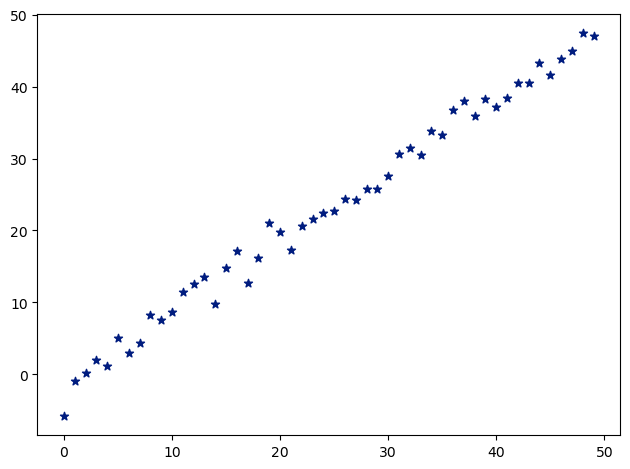

In [4]:
# SCATTER PLOT
with plt.style.context('seaborn-dark-palette'):
    fig = plt.figure(tight_layout=True)
    plt.scatter(x, y, marker='*')
    plt.show()

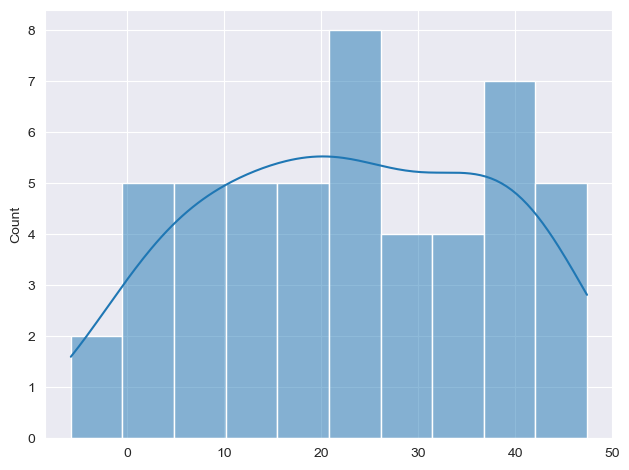

In [5]:
# HISTOGRAM
sns.set_style('darkgrid')
fig = plt.figure(tight_layout=True)
sns.histplot(data=y, kde=True, bins=int(size/5))
plt.show()

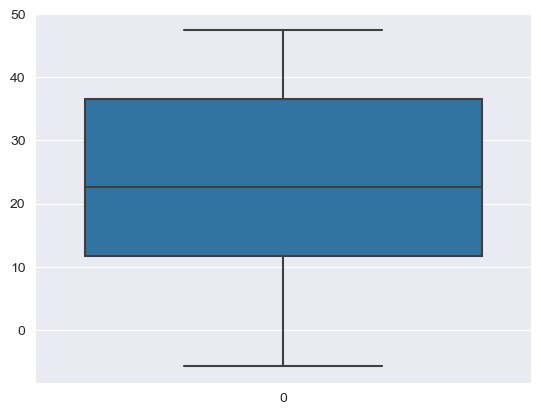

In [6]:
# BOXPLOT
sns.boxplot(data=y)
plt.show()

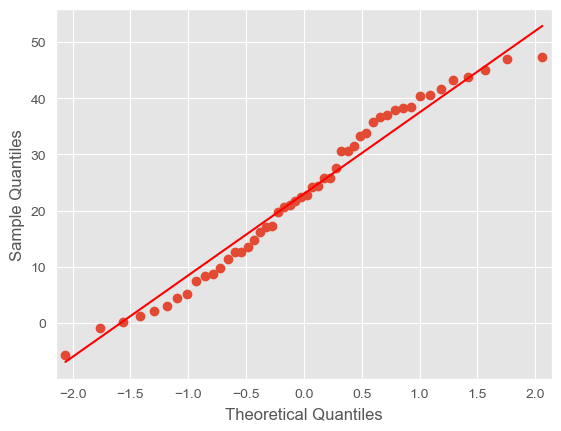

In [7]:
# QQ-PLOT
# TODO: https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
with plt.style.context('ggplot'):
    sm.qqplot(np.array(y, dtype=object), line='s')
    py.show()

# **1. implementation**

## **hypothesis**

For 1 feature:
$$y_i = h(x_i) = x_i * w + b$$
Where:
- $h$ : hypothesis
- $x_i$ : input-feature, independent variable
- $y_i$ : dependent-variable
- $w$ : slope
- $b$ : bias, y-intercept

In [8]:
def h(x, w, b):
    """Hypothesis function
    
    Args:
        x (float): i-th feature array sample
        w (float): slope of linear function
        b (float): bias

    Returns:
        float: model prediction
    """
    return x * w + b

## **loss function**

### **MSE**

Also called Quadratic Loss or L2 loss. Is measured as the average of squared difference between predictions and actual observations. 

$$L(x_i) = \text{Error} = \frac{1}{2m} \sum^{m}_{i=0} (y_i - h(x_i))^2$$

MSE has nice mathematical properties whic makes it easier to calculate gradients.

There are also other error functions like: MAE, Huber-Loss. See more [here](https://pytorch.org/docs/stable/nn.functional.html).

In [9]:
def error(y, x, w, b):
    """Error function
    
    Args:
        y (np.array): target array sample
        x (np.array): feature array sample
        w (float): slope of linear function
        b (float): bias | intercept of linear function

    Returns:
        float: error, result of MSE
    """
    N = len(y)
    return sum(
        [
            (h(x[i], w, b) - y[i]) ** 2 for i in range(N)
        ]
    ) / (2*N)

## **gradient descent**

## **application**

In [10]:
def train(x, y, umbral, alfa):
    """Train model
    
    Args:
        x (np.array): input feature, feature array sample
        y (np.array): feature to predict, target array sample
        umbral (float): error threshold | avoid infinite loop and overfitting
        alfa (float): learning rate

    Returns:
        tuple: (w, b, error)
    """
    w = np.random.rand()
    b = np.random.rand()
    it_history = []

    error_value = error(y, x, w, b)
    while error_value > umbral:
        it_history.append((w, b, error_value))

        w = w - alfa * sum(
            [
                (h(x[i], w, b) - y[i]) * x[i] for i in range(len(y))
            ]
        ) / len(y)
        b = b - alfa * sum(
            [
                (h(x[i], w, b) - y[i]) for i in range(len(y))
            ]
        ) / len(y)

        error_value = error(y, x, w, b)
        # error_test = error(y_test, x_test, w, b)        # ? error de test
        print(f'error: {error_value}')      # error de training ....
    return w, b, error_value, it_history

def test(x, y, w, b):
    fig = plt.figure()
    plt.plot(x,y,'*')
    plt.plot(x,[h(xi,w,b) for xi in x])
    plt.show()

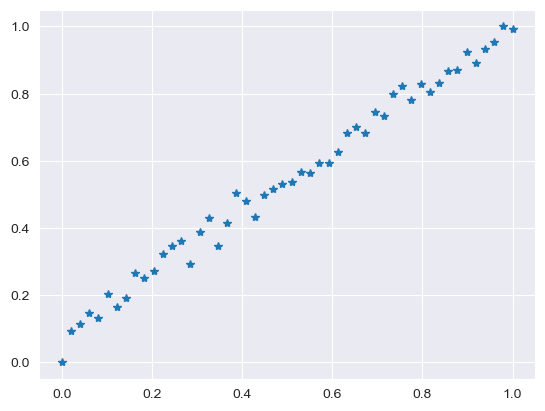

In [11]:
# NORMALIZE DATA: MIN-MAX NORMALIZATION 0-1
max_x = max(x)
min_x = min(x)
x = [(e - min_x)/(max_x - min_x) for e in x]

max_y = max(y)
min_y = min(y)
y = [(e - min_y)/(max_y - min_y) for e in y]

plt.plot(x,y,'*')
plt.show()

In [32]:
w, b, error_value, it_history = train(x, y, 0.00099, 0.05)

error: 0.161344307753351
error: 0.14201621853059232
error: 0.12503706219787739
error: 0.11012122399088656
error: 0.09701781627323354
error: 0.08550645635436493
error: 0.07539355763393513
error: 0.06650907166409596
error: 0.05870362630851379
error: 0.0518460118418566
error: 0.045820972688138874
error: 0.0405272676391725
error: 0.03587596591198834
error: 0.03178895037247873
error: 0.028197602738437775
error: 0.025041648637298825
error: 0.02226814308371379
error: 0.019830579304941046
error: 0.017688105917573013
error: 0.015804839282356632
error: 0.014149259465425027
error: 0.012693679641110352
error: 0.011413780007321035
error: 0.010288198370033615
error: 0.009298170507038107
error: 0.008427214258730161
error: 0.00766085202955873
error: 0.006986367030095899
error: 0.0063925891574709084
error: 0.005869706910657941
error: 0.005409102175218264
error: 0.005003205096944455
error: 0.0046453666019126314
error: 0.004329746417406737
error: 0.004051214709033735
error: 0.0038052656784889668
error: 0

In [33]:
print(len(it_history))

194


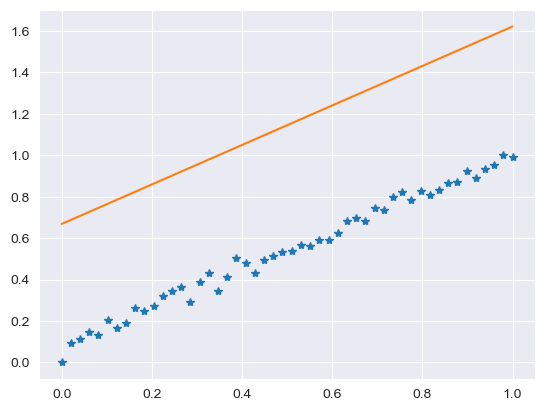

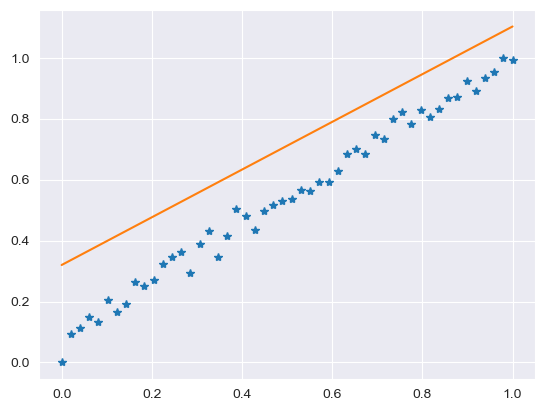

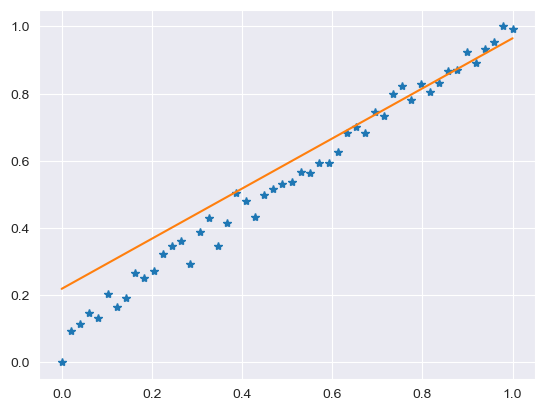

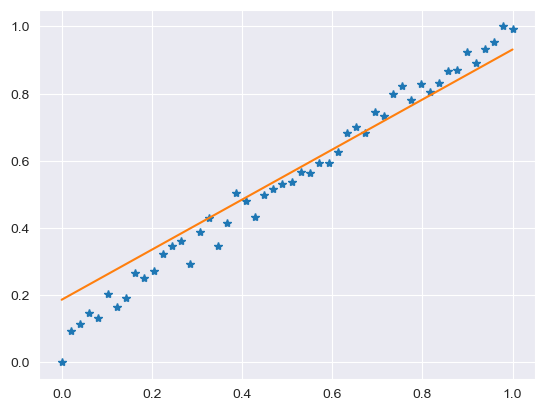

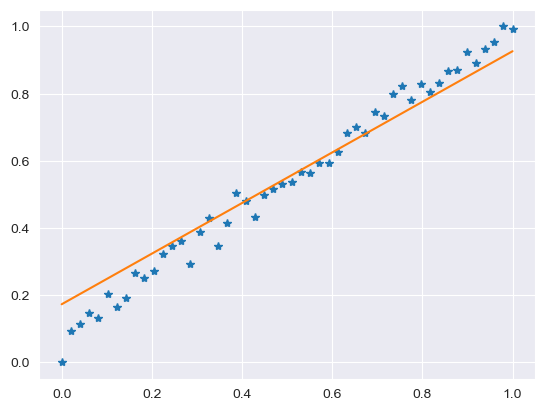

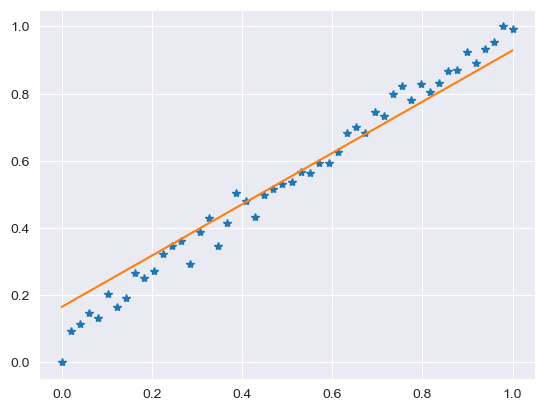

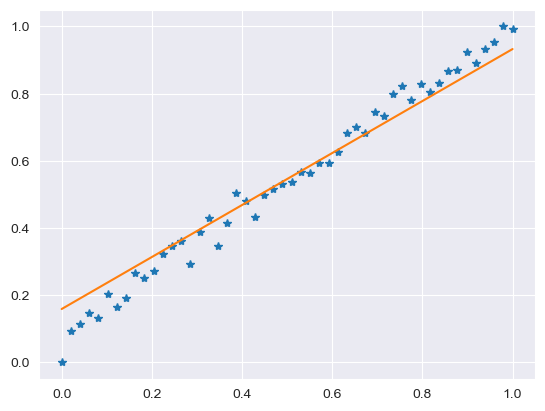

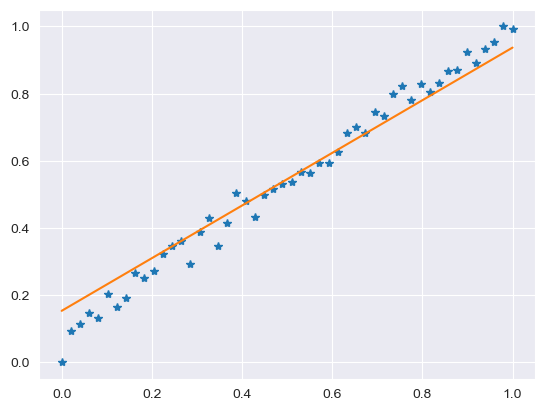

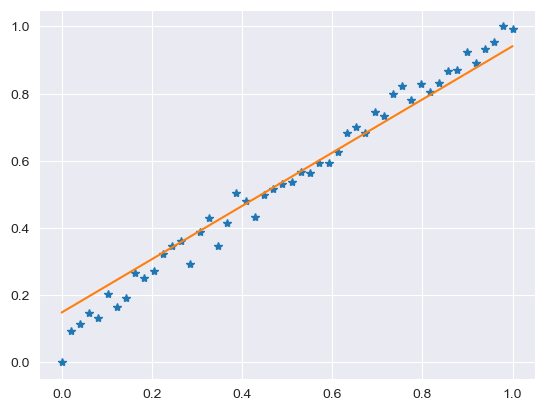

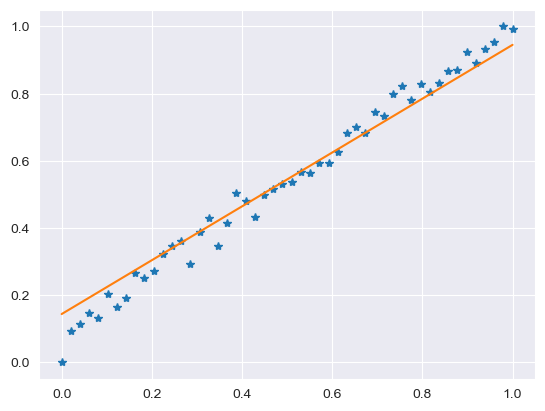

In [34]:
for _ in range(0, len(it_history), 20):
    ww, bb, ee = it_history[_]
    test(x, y, ww, bb)

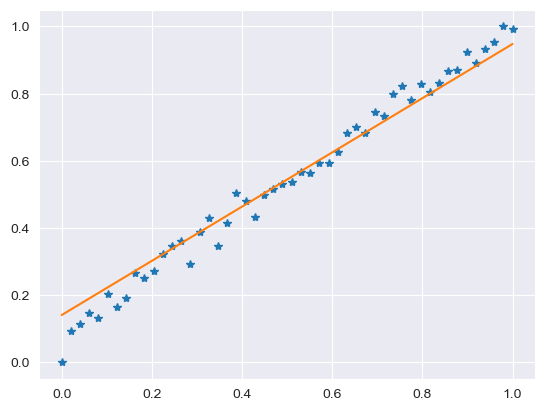

In [35]:
test(x, y, w, b)

# **2. analysis**

0.9887656980859956 [[0.92086769]] [0.08006251]


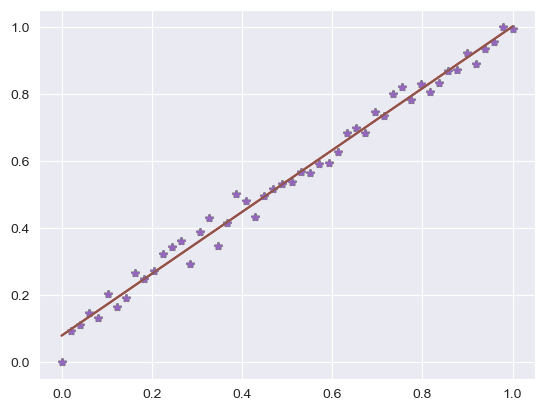

In [60]:
from sklearn.linear_model import LinearRegression       # modelos
import numpy as np      # matrices
import pandas as pd     # data preprocesssing en R -> csv

reg = LinearRegression().fit(
    np.array(x).reshape(-1, 1),
    np.array(y).reshape(-1, 1)
)

print(
    reg.score(
        np.array(x).reshape(-1, 1), 
        np.array(y).reshape(-1, 1)
    ),
    reg.coef_,
    reg.intercept_
)

# plot the line of reg model

plt.plot(x,y,'*')
plt.plot(x, reg.predict(np.array(x).reshape(-1, 1)))
plt.show()

In [36]:
# https://www.statsmodels.org/devel/regression.html
# https://www.statsmodels.org/devel/endog_exog.html
model = sm.OLS(endog=y, exog=x)     # Ordinary Least Squares
res = model.fit()

In [28]:
lookup(type(model))

<class 'statsmodels.regression.linear_model.OLS'>
	<class 'statsmodels.regression.linear_model.WLS'>
		<class 'statsmodels.regression.linear_model.RegressionModel'>
			<class 'statsmodels.base.model.LikelihoodModel'>
				<class 'statsmodels.base.model.Model'>
					<class 'object'>


In [29]:
get_info(res)

	 <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
dir
 ['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_c

[1.03974838]


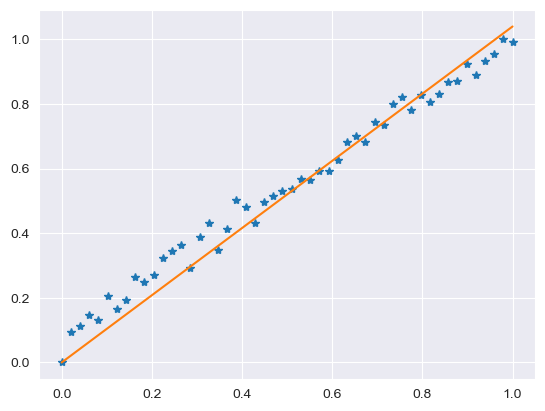

In [56]:
print(
    res.params,
)
# plot the line of res
plt.plot(x,y,'*')
plt.plot(x,[res.params[0] * xi for xi in x])
plt.show()

In [37]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              7173.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    8.48e-55
Time:                        17:30:32   Log-Likelihood:                          78.973
No. Observations:                  50   AIC:                                     -155.9
Df Residuals:                      49   BIC:                                     -154.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0397      0.012     84.694      0.000       1.015       1.064
==============================================================================
Omnibus:                        7.063   Durbin-Watson:                   0.642
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                2.584
Skew:                           0.171   Prob(JB):                        0.275
Kurtosis:                       1.940   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.993    
Dependent Variable:     y                AIC:                         -155.9452
Date:                   2023-04-30 17:29 BIC:                         -154.0332
No. Observations:       50               Log-Likelihood:              78.973   
Df Model:               1                F-statistic:                 7173.    
Df Residuals:           49               Prob (F-statistic):          8.48e-55 
R-squared (uncentered): 0.993            Scale:                       0.0025375
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
x1         1.0397         0.0123       84.6944       0.0000       1.0151       1.0644
-------------------------------------------------------------------------------
Omnibus:                    7.063            Durbin-Watson:               0.642
Prob(Omnibus):              0.029            Jarque-Bera (JB):            2.584
Skew:                       0.171            Prob(JB):                    0.275
Kurtosis:                   1.940            Condition No.:               1    
===============================================================================

"""

# **3. references**

- https://medium.com/analytics-vidhya/understanding-the-linear-regression-808c1f6941c0
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a